<a href="https://colab.research.google.com/github/ludovicolc/Spotify_API_project/blob/main/spotify_API_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify API

### Obiettivo principale del progetto
Raccogliere informazioni riguardanti artisti e brani attraverso l'utilizzo dell'API fornita da Spotify, per poi comprendere le caratteristiche principali del mercato musicale in una determinata area o in un determinato intervallo temporale.

In questo progetto sono state raccolte informazioni per l'anno 2022, riguardanti 30 nazioni europee, è comunque possibile variare i parametri di ricerca a proprio piacimento.

### Fasi del progetto
1.   Utilizzo libreria spotipy per raccolta dati
2.   Rielaborazione DataFrame & Pulizia Dati
3.   Analisi dei dati

### Note importanti
*   Le credenziali per poter utilizzare l'API di spotify sono ottenibili sulla seguente pagina: https://developer.spotify.com/dashboard/login 
*   Il numero di richieste all'interno della funzione music_fun() non può superare 1000
*   I mercati (nazioni) ricercati devono essere espressi nella forma: ISO 3166-1 alpha-2
*   Per informazioni riguardo alle features delle tracce guardare la seguente pagina: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features 



# Libraries

In [ ]:
# Installazione libreria spotipy
!pip install spotipy

In [ ]:
# Raccolta dati
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
# Gestione dati
import pandas as pd
# Visualizzazioni
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('mako')

# 1. Estrazione dati
Note:
*   L'estrazione dati si sviluppa in 3 fasi principali: a | b | c
*   Nella prima fase attraverso la funzione music_fun() vengono estratte le informazioni principali
*   Nella fase 'b' vengono utilizzati i dati chiave ottenuti nella fase 'a' per poter estrarre ulteriori elementi 
*   Nella fase 'c' vengono infine uniti i vari dati per generare un Dataframe compatto 

In [ ]:
# Credenziali per accesso
credenziali = SpotifyClientCredentials(client_id='CLIENT_ID',
                                       client_secret='CLIENT_SECRET')
sp = spotipy.Spotify(client_credentials_manager=credenziali)

## a. Estrazione dati base

In [ ]:
# Richiesta informazioni
def music_fun(numero=1000, anno=2022, mercato='IT'):
    for i in range(0, numero, 50):
        track_results = sp.search(q=f'year: {anno}', type='track', limit=50,offset=i, market=f'{mercato}')

        for i, t in enumerate(track_results['tracks']['items']):
            artist_name = t['artists'][0]['name']
            artist_id = t['artists'][0]['id']
            track_name = t['name']
            track_id = t['id']
            track_popularity = t['popularity']
            
            track_info = {
                'nome_artista': artist_name,
                'id_artista': artist_id,
                'nome_traccia': track_name,
                'id_traccia': track_id,
                'popolarità_traccia': track_popularity,
                'mercato': mercato
            } 
            
            tracks.append(track_info)

In [ ]:
# Elementi base
tracks = []
mercati_ricerca = ['IT', 'GB', 'FR', 'DE', 'NL', 'ES', 'BE', 'PT', 'CH', 'LT',
                   'LU', 'AT', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'GR',
                   'HU', 'IE', 'LV', 'MT', 'PL', 'RO', 'SK', 'SI', 'SE', 'NO']

In [ ]:
# Iterazione richiesta per parametri scelti
for mr in mercati_ricerca:
    music_fun(numero=1000, anno=2022, mercato=mr)
    time.sleep(2)

In [ ]:
# Creazione Dataframe
df_tracks = pd.DataFrame(tracks)

In [ ]:
df_tracks.head()

,nome_artista,id_artista,nome_traccia,id_traccia,popolarità_traccia,mercato
0,Fedez,3pgCLfNbw5ozIfoNsvDU7i,LA DOLCE VITA,0I0b7uTFfHhBz5bMkSDouF,81,IT
1,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,IT
2,Pinguini Tattici Nucleari,6RdcIWVKYYzNzjQRd3oyHS,Giovani Wannabe,7iLuBTHJSXM2HalKHFqEEy,79,IT
3,Sam Smith,2wY79sveU1sp5g7SokKOiI,Dancing With A Stranger,62QV4FOYHz5fybzAmdp3uq,1,IT
4,Kaleb Di Masi,5U5wYVqrbD6J8SK4kNhau4,Hace Calor - Remix,3h043RAJ7tKaG1HDFeet6w,80,IT


## b. Estrazione dati aggiuntivi
Per velocizzare la ricerca viene costruito un nuovo Dataframe senza duplicati.

La presenza di duplicati è data dal fatto che molti artisti sono presenti su diversi mercati.

In [ ]:
# Nuovo Dataframe senza colonna mercato
df_filtrato_base = df_tracks.drop(columns='mercato')

In [ ]:
df_filtrato_base.duplicated().sum()

24123

In [ ]:
# Rimozione duplicati
df_filtrato_base.drop_duplicates(inplace=True)

Utilizzo 'id_artista' per ottenere informazioni dettagliate riguardo artisti

In [ ]:
# Richiesta informazioni artisti
artisti = []
for id_art in df_filtrato_base['id_artista']:
    artista = sp.artist(id_art)
    popolarità_artista = artista['popularity']
    genere_artista = artista['genres']
    followers_artista = artista['followers']['total']
    
    artista_info = {
        'popolarità_artista': popolarità_artista,
        'genere_artista': genere_artista,
        'followers_artista': followers_artista
    }

    artisti.append(artista_info)
    time.sleep(0.05)

In [ ]:
# Creazione Dataframe
df_artisti = pd.DataFrame(artisti)

In [ ]:
df_artisti.head()

,popolarità_artista,genere_artista,followers_artista
0,68,[italian pop],1831669
1,76,"[album rock, art rock, classic rock, glam rock...",8360974
2,69,"[bergamo indie, italian indie pop, italian pop...",884641
3,81,"[dance pop, pop, uk pop]",19811397
4,70,"[cumbia 420, rkt]",356633


Utilizzo 'id_traccia' per ottenere informazioni dettagliate riguardo le tracce.

Queste informazioni vengono fornite sotto una forma compatta, per questo motivo viene prima creato un Dataframe e poi le informazioni vengono 'spacchettate' per poter essere aggiunte alle varie colonne

In [ ]:
# Richiesta informazioni tracce
id_traccia = []
tracks_features = []
for id_tr in df_filtrato_base['id_traccia']:
    f = sp.audio_features(id_tr)
    tracks_features.append([f])
    time.sleep(0.05)
    id_traccia.append(id_tr)

In [ ]:
# Creazione Dataframe vuoto
df_tracks_features = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                                             'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
                                             'analysis_url', 'duration_ms', 'time_signature'])

In [ ]:
# Separazione informazioni e attaccamento al Dataframe
for item in tracks_features:
    for ft in item:
        df_tracks_features = df_tracks_features.append(ft, ignore_index=True)

In [ ]:
# Aggiunta colonna 'id_traccia' per unione successiva
df_tracks_features['id_traccia'] = id_traccia

In [ ]:
df_tracks_features.head()

,0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,id_traccia
0,NaN,0.0124,https://api.spotify.com/v1/audio-analysis/0I0b...,0.737,187862,0.858,0I0b7uTFfHhBz5bMkSDouF,0,8,0.3820,-3.589,1,0.0527,144.991,4,https://api.spotify.com/v1/tracks/0I0b7uTFfHhB...,audio_features,spotify:track:0I0b7uTFfHhBz5bMkSDouF,0.919,0I0b7uTFfHhBz5bMkSDouF
1,NaN,0.1420,https://api.spotify.com/v1/audio-analysis/1JIz...,0.460,283753,0.326,1JIzFhI9Lt5FyslawmHCBi,0.00001,7,0.0449,-10.699,1,0.0417,152.531,3,https://api.spotify.com/v1/tracks/1JIzFhI9Lt5F...,audio_features,spotify:track:1JIzFhI9Lt5FyslawmHCBi,0.321,1JIzFhI9Lt5FyslawmHCBi
2,NaN,0.0409,https://api.spotify.com/v1/audio-analysis/7iLu...,0.739,212967,0.810,7iLuBTHJSXM2HalKHFqEEy,0,11,0.1220,-5.317,0,0.0311,127.972,4,https://api.spotify.com/v1/tracks/7iLuBTHJSXM2...,audio_features,spotify:track:7iLuBTHJSXM2HalKHFqEEy,0.948,7iLuBTHJSXM2HalKHFqEEy
3,NaN,0.4470,https://api.spotify.com/v1/audio-analysis/62QV...,0.741,171030,0.520,62QV4FOYHz5fybzAmdp3uq,0.000002,8,0.2220,-7.513,1,0.0656,102.998,4,https://api.spotify.com/v1/tracks/62QV4FOYHz5f...,audio_features,spotify:track:62QV4FOYHz5fybzAmdp3uq,0.347,62QV4FOYHz5fybzAmdp3uq
4,NaN,0.3670,https://api.spotify.com/v1/audio-analysis/3h04...,0.889,247385,0.618,3h043RAJ7tKaG1HDFeet6w,0.00438,5,0.1050,-5.124,0,0.0627,130.021,4,https://api.spotify.com/v1/tracks/3h043RAJ7tKa...,audio_features,spotify:track:3h043RAJ7tKaG1HDFeet6w,0.444,3h043RAJ7tKaG1HDFeet6w


## c. Unione dati ottenuti
I Dataframe 'filtrato_base' e 'artisti' contengono lo stesso numero di righe e sono disposti nello stesso ordine per cui vengono semplicemente attaccati, invece il Dataframe 'tracks_features' non contiene lo stesso numero di righe e quindi viene utilizzata la colonna 'id_traccia' per associare correttamente le informazioni.

In [ ]:
# Unione iniziale
df_raw_musica = pd.concat([df_filtrato_base.reset_index(drop=True), df_artisti.reset_index(drop=True)], axis=1)

In [ ]:
# Unione sulla colonna 'id_traccia' per creare Dataframe unico
df_raw_musica = pd.merge(df_raw_musica, df_tracks_features, how='outer', on = 'id_traccia')

In [ ]:
df_raw_musica.head()

,nome_artista,id_artista,nome_traccia,id_traccia,popolarità_traccia,popolarità_artista,genere_artista,followers_artista,0,acousticness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Fedez,3pgCLfNbw5ozIfoNsvDU7i,LA DOLCE VITA,0I0b7uTFfHhBz5bMkSDouF,81,68,[italian pop],1831669,NaN,0.0124,...,0.3820,-3.589,1,0.0527,144.991,4,https://api.spotify.com/v1/tracks/0I0b7uTFfHhB...,audio_features,spotify:track:0I0b7uTFfHhBz5bMkSDouF,0.919
1,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,76,"[album rock, art rock, classic rock, glam rock...",8360974,NaN,0.1420,...,0.0449,-10.699,1,0.0417,152.531,3,https://api.spotify.com/v1/tracks/1JIzFhI9Lt5F...,audio_features,spotify:track:1JIzFhI9Lt5FyslawmHCBi,0.321
2,Pinguini Tattici Nucleari,6RdcIWVKYYzNzjQRd3oyHS,Giovani Wannabe,7iLuBTHJSXM2HalKHFqEEy,79,69,"[bergamo indie, italian indie pop, italian pop...",884641,NaN,0.0409,...,0.1220,-5.317,0,0.0311,127.972,4,https://api.spotify.com/v1/tracks/7iLuBTHJSXM2...,audio_features,spotify:track:7iLuBTHJSXM2HalKHFqEEy,0.948
3,Sam Smith,2wY79sveU1sp5g7SokKOiI,Dancing With A Stranger,62QV4FOYHz5fybzAmdp3uq,1,81,"[dance pop, pop, uk pop]",19811397,NaN,0.4470,...,0.2220,-7.513,1,0.0656,102.998,4,https://api.spotify.com/v1/tracks/62QV4FOYHz5f...,audio_features,spotify:track:62QV4FOYHz5fybzAmdp3uq,0.347
4,Kaleb Di Masi,5U5wYVqrbD6J8SK4kNhau4,Hace Calor - Remix,3h043RAJ7tKaG1HDFeet6w,80,70,"[cumbia 420, rkt]",356633,NaN,0.3670,...,0.1050,-5.124,0,0.0627,130.021,4,https://api.spotify.com/v1/tracks/3h043RAJ7tKa...,audio_features,spotify:track:3h043RAJ7tKaG1HDFeet6w,0.444


In [ ]:
df_raw_musica.to_csv('spotify_musica_grezzo.csv', index=False)

# 2. Rielaborazione DataFrame & Pulizia Dati

In [ ]:
# Avvio Dataframe da rielaborare
df_musica = pd.read_csv('/content/spotify_musica_grezzo.csv')

In [ ]:
df_musica.dtypes

nome_artista           object
id_artista             object
nome_traccia           object
id_traccia             object
popolarità_traccia      int64
popolarità_artista      int64
genere_artista         object
followers_artista       int64
0                     float64
acousticness          float64
analysis_url           object
danceability          float64
duration_ms           float64
energy                float64
id                     object
instrumentalness      float64
key                   float64
liveness              float64
loudness              float64
mode                  float64
speechiness           float64
tempo                 float64
time_signature        float64
track_href             object
type                   object
uri                    object
valence               float64
dtype: object

In [ ]:
# Conversione colonne in formato 'string'
df_musica['nome_artista'] = df_musica['nome_artista'].astype(str)
df_musica['nome_traccia'] = df_musica['nome_traccia'].astype(str)
df_musica['genere_artista'] = df_musica['genere_artista'].astype(str)

Cambio unità colonne durata e followers per migliore comprensione

In [ ]:
# Durata tracce da millisecondi a minuti
df_musica['duration_ms'] = df_musica['duration_ms'] / 60000

In [ ]:
# Followers artista cambio unità di misura (migliaia)
df_musica['followers_artista'] = df_musica['followers_artista'] / 1000

In [ ]:
# Rinominare colonne
df_musica.rename(columns = {'duration_ms':'duration_min', 'followers_artista': 'followers_artista_k'}, inplace=True)

Verifica presenza valori nulli e duplicati

In [ ]:
# Nulli
df_musica.isnull().sum()

nome_artista              0
id_artista                0
nome_traccia              0
id_traccia                0
popolarità_traccia        0
popolarità_artista        0
genere_artista            0
followers_artista_k       0
0                      5889
acousticness              4
analysis_url              4
danceability              4
duration_min              4
energy                    4
id                        4
instrumentalness          4
key                       4
liveness                  4
loudness                  4
mode                      4
speechiness               4
tempo                     4
time_signature            4
track_href                4
type                      4
uri                       4
valence                   4
dtype: int64

In [ ]:
# Per quali tracce non vengono rappresentate le features
df_musica.loc[df_raw_musica['energy'].isnull()]

,nome_artista,id_artista,nome_traccia,id_traccia,popolarità_traccia,popolarità_artista,genere_artista,followers_artista_k,0,acousticness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
3182,Universe Collectors,2RavKkz1kkDUEVWjSrLUOu,Mind Calming Noise,6IEpMvQOYDtEyVE5ZOP9UA,66,47,[],0.021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4598,Noise Factory,686XlpvIgKX6Vvlpi4DXbe,Streams Of White Noise,431o4ppINAaETCjpsGkGDv,49,40,['white noise'],0.177,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5729,Bamse,1V95p8oWGxXlpcFRYqXV3w,Härmapor i djungeln - Outro,3HT1kHSGQ4gzTGjzdoqdYw,0,56,"['barnmusik', 'barnsagor']",19.428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5730,Bamse,1V95p8oWGxXlpcFRYqXV3w,Härmapor i djungeln - Intro,1Zg1UqFKP68bsqXW8nu3th,0,56,"['barnmusik', 'barnsagor']",19.428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Duplicati
df_musica.duplicated().sum()

12

In [ ]:
# Rimozione duplicati
df_musica = df_musica.drop_duplicates()

In [ ]:
# Rimozione colonne non necessarie
colonne_da_rimuovere = ['id_artista', 'id_traccia', 'key', 'type', 'id', 'uri', 'track_href', 'analysis_url', '0']
df_musica = df_musica.drop(columns=colonne_da_rimuovere)

In [ ]:
# Creazione file csv (pulito e riorganizzato)
df_musica.to_csv('spotify_musica_pulito.csv', index=False)

# 3. Analisi dei dati

Informazioni principali riguardo il mercato musicale nell'area selezionata

In [ ]:
# Presenza artisti nei vari mercati
mercati_per_artista = df_tracks.groupby('nome_artista', as_index=False)['mercato'].nunique()
mercati_per_artista.sort_values(by=['mercato'], ascending=False)

,nome_artista,mercato
135,Anthony Phillips,30
1461,Nathan Dawe,30
143,Aokihiroshi,30
144,Aphrodite,30
534,Doja Cat,30
...,...,...
909,Jake La Furia,1
908,Jada,1
907,Jacuś,1
906,Jacob LeCroy,1


In [ ]:
# Numero di tracce prodotte da ogni artista
tracce_per_artista = df_musica.groupby('nome_artista', as_index=False)['nome_traccia'].nunique()
tracce_per_artista.rename(columns = {'nome_traccia':'numero_tracce'}, inplace = True)
tracce_per_artista.sort_values(by=['numero_tracce'], ascending=False)

,nome_artista,numero_tracce
376,Chris Brown,34
249,Bibi Blocksberg,33
575,Ed Sheeran,33
891,J Balvin,30
1931,THE YELLOW MONKEY,30
...,...,...
1242,MC Kevin o Chris,1
1241,MC Hammer,1
466,Danna,1
467,Danny Ocean,1


In [ ]:
# Numero di followers per ogni artista
followers_per_artista = df_musica.groupby('nome_artista', as_index=False)['followers_artista_k'].mean()
followers_per_artista.sort_values(by=['followers_artista_k'], ascending=False)

,nome_artista,followers_artista_k
575,Ed Sheeran,100034.551
253,Billie Eilish,65989.651
550,Drake,65321.252
1006,Justin Bieber,63381.638
618,Eminem,57534.988
...,...,...
918,Janina Garscia,0.000
1976,The Lujza,0.000
143,Aokihiroshi,0.000
1342,Max Moose Band,0.000


In [ ]:
# Generi musicali all'interno dei mercati selezionati
pd.Series([x for _list in df_artisti['genere_artista'] for x in _list]).value_counts()

pop                     818
dance pop               498
uk pop                  312
pop dance               252
czsk hip hop            229
                       ... 
vlaamse kinderliedje      1
dutch trap                1
children's music          1
children's choir          1
mgpjr                     1
Length: 733, dtype: int64

Osservazioni su elementi numerici

In [ ]:
# Caratteristiche principali elementi numerici
df_musica.describe()

,popolarità_traccia,popolarità_artista,followers_artista_k,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,5877.000000,5877.000000,5877.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000
mean,44.533946,58.241960,7148.606823,0.220849,0.691168,3.147783,0.663306,0.051978,0.183846,-7.090655,0.484080,0.139924,123.185243,3.962540,0.534538
std,25.109246,21.088762,18444.653404,0.233356,0.140130,0.935012,0.173878,0.189488,0.144721,3.313042,0.499789,0.141646,26.900855,0.328007,0.223734
min,0.000000,0.000000,0.000000,0.000000,0.128000,0.318683,0.001040,0.000000,0.019100,-41.094000,0.000000,0.023100,33.008000,1.000000,0.000000
25%,32.000000,46.000000,18.746000,0.040300,0.607000,2.640667,0.565000,0.000000,0.096600,-8.210000,0.000000,0.046600,100.038000,4.000000,0.371000
50%,52.000000,59.000000,162.742000,0.139000,0.710000,3.046617,0.678000,0.000000,0.125000,-6.495000,0.000000,0.081700,123.070000,4.000000,0.537000
75%,62.000000,73.000000,1783.972000,0.325000,0.792000,3.508433,0.790000,0.000176,0.223000,-5.117000,1.000000,0.197000,140.014000,4.000000,0.701000
max,100.000000,100.000000,100034.551000,0.995000,0.981000,15.352000,0.999000,0.986000,0.992000,2.557000,1.000000,0.966000,215.982000,5.000000,0.985000


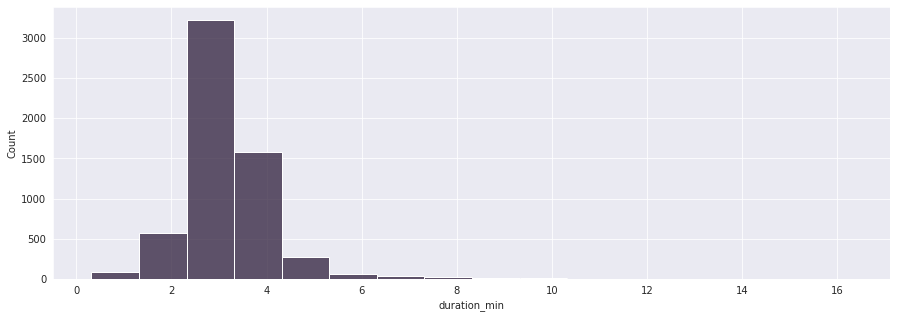

In [ ]:
# Distribuzione durata tracce
plt.figure(figsize=(15, 5))
sns.histplot(x='duration_min', data=df_musica, binwidth=1)

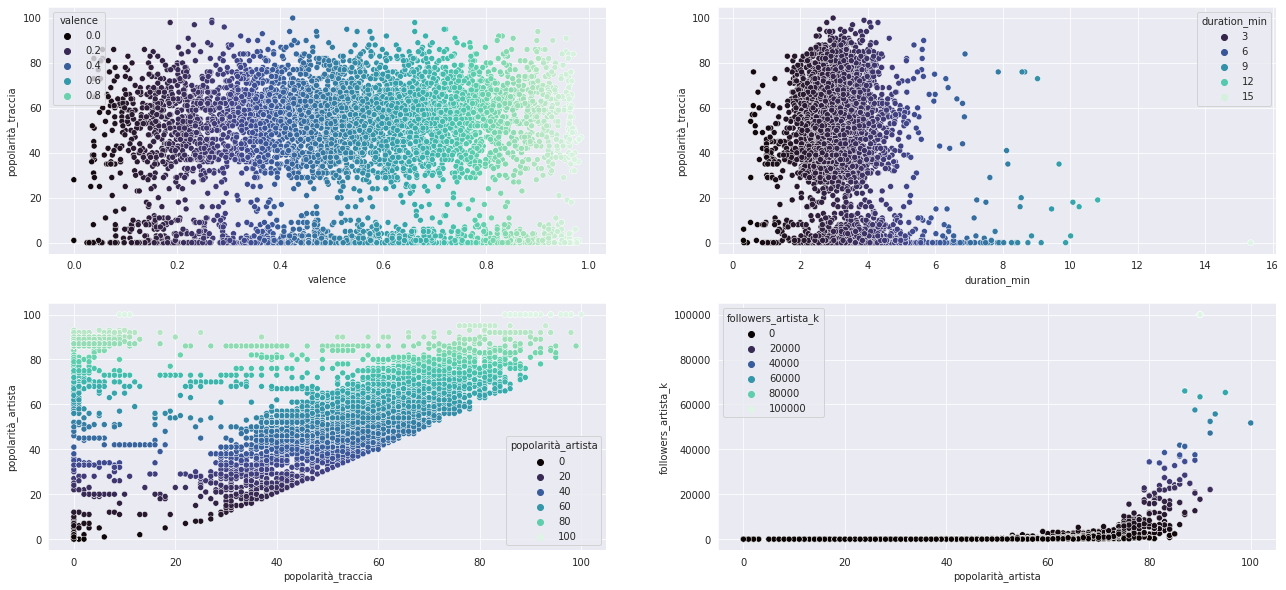

In [ ]:
# Correlazioni
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(22, 10))

# Le tracce che esprimono emozioni positive sono più popolari?
sns.scatterplot(x='valence', y='popolarità_traccia', data=df_musica, hue='valence', palette='mako', ax = axs[0, 0])
# La durata di una traccia influenza la sua popolarità?
sns.scatterplot(x='duration_min', y='popolarità_traccia', data=df_musica, hue='duration_min', palette='mako', ax = axs[0, 1])
# La popolarità di una traccia si ripercuote sull'artista?
sns.scatterplot(x='popolarità_traccia', y='popolarità_artista', data=df_musica, hue='popolarità_artista', palette='mako', ax = axs[1, 0])
# Quanto incide la popolarità di un artista sul suo numero di followers?
sns.scatterplot(x='popolarità_artista', y='followers_artista_k', data=df_musica, hue='followers_artista_k', palette='mako', ax = axs[1, 1])

Relazioni tra features

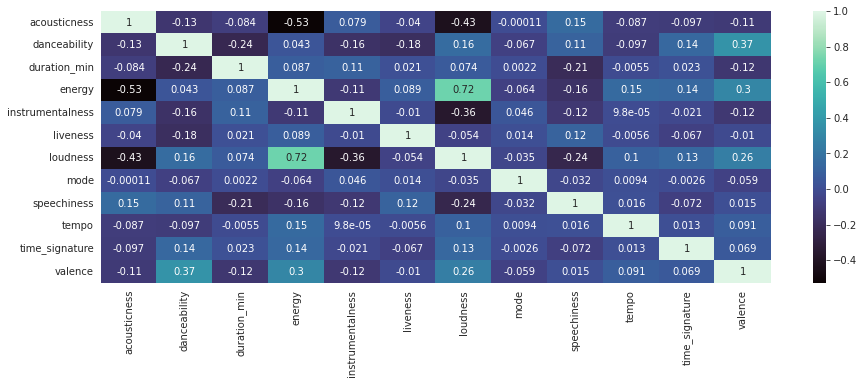

In [ ]:
# Correlazioni totali
audio_features = df_musica.drop(columns=['popolarità_traccia', 'popolarità_artista', 'followers_artista_k'])
plt.figure(figsize=(15, 5))
sns.heatmap(data=audio_features.corr(), cmap='mako', annot=True)